# Exercise 1.1

Import daily quotes for three different companies (e.g., MSFT, KO, PEP, AMZN, INTL, or ^GSPC for the S&P 500) from Yahoo Finance.

Combine all closing prices into a single data frame and plot them on a single chart.

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
quotations_msft = yf.download("MSFT", 
                           start = "2005-01-01", 
                           end = "2025-10-17")
quotations_ko = yf.download("KO", 
                           start = "2005-01-01", 
                           end = "2025-10-17")
quotations_pep = yf.download("PEP", 
                           start = "2005-01-01", 
                           end = "2025-10-17")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
quotations_msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5231 entries, 2005-01-03 to 2025-10-16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   5231 non-null   float64
 1   (High, MSFT)    5231 non-null   float64
 2   (Low, MSFT)     5231 non-null   float64
 3   (Open, MSFT)    5231 non-null   float64
 4   (Volume, MSFT)  5231 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 245.2 KB


In [8]:
quotations_ko.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5231 entries, 2005-01-03 to 2025-10-16
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (Close, KO)   5231 non-null   float64
 1   (High, KO)    5231 non-null   float64
 2   (Low, KO)     5231 non-null   float64
 3   (Open, KO)    5231 non-null   float64
 4   (Volume, KO)  5231 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 245.2 KB


In [9]:
quotations_pep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5231 entries, 2005-01-03 to 2025-10-16
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, PEP)   5231 non-null   float64
 1   (High, PEP)    5231 non-null   float64
 2   (Low, PEP)     5231 non-null   float64
 3   (Open, PEP)    5231 non-null   float64
 4   (Volume, PEP)  5231 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 245.2 KB


In [13]:
msft_close = quotations_msft[('Close', 'MSFT')]
ko_close = quotations_ko[('Close', 'KO')]
pep_close = quotations_pep[('Close', 'PEP')]

combined_closing = pd.concat({
    'MSFT': msft_close,
    'KO': ko_close,
    'PEP': pep_close
}, axis=1)

print("Combined closing data:")
print(combined_closing.head())
print(f"data shape: {combined_closing.shape}")

Combined closing data:
                 MSFT         KO        PEP
Date                                       
2005-01-03  18.454882  11.093913  28.976845
2005-01-04  18.523899  10.939014  28.770441
2005-01-05  18.482492  10.888273  28.803898
2005-01-06  18.461777  10.979070  29.010324
2005-01-07  18.406570  10.992431  29.261383
data shape: (5231, 3)


<Figure size 1400x800 with 0 Axes>

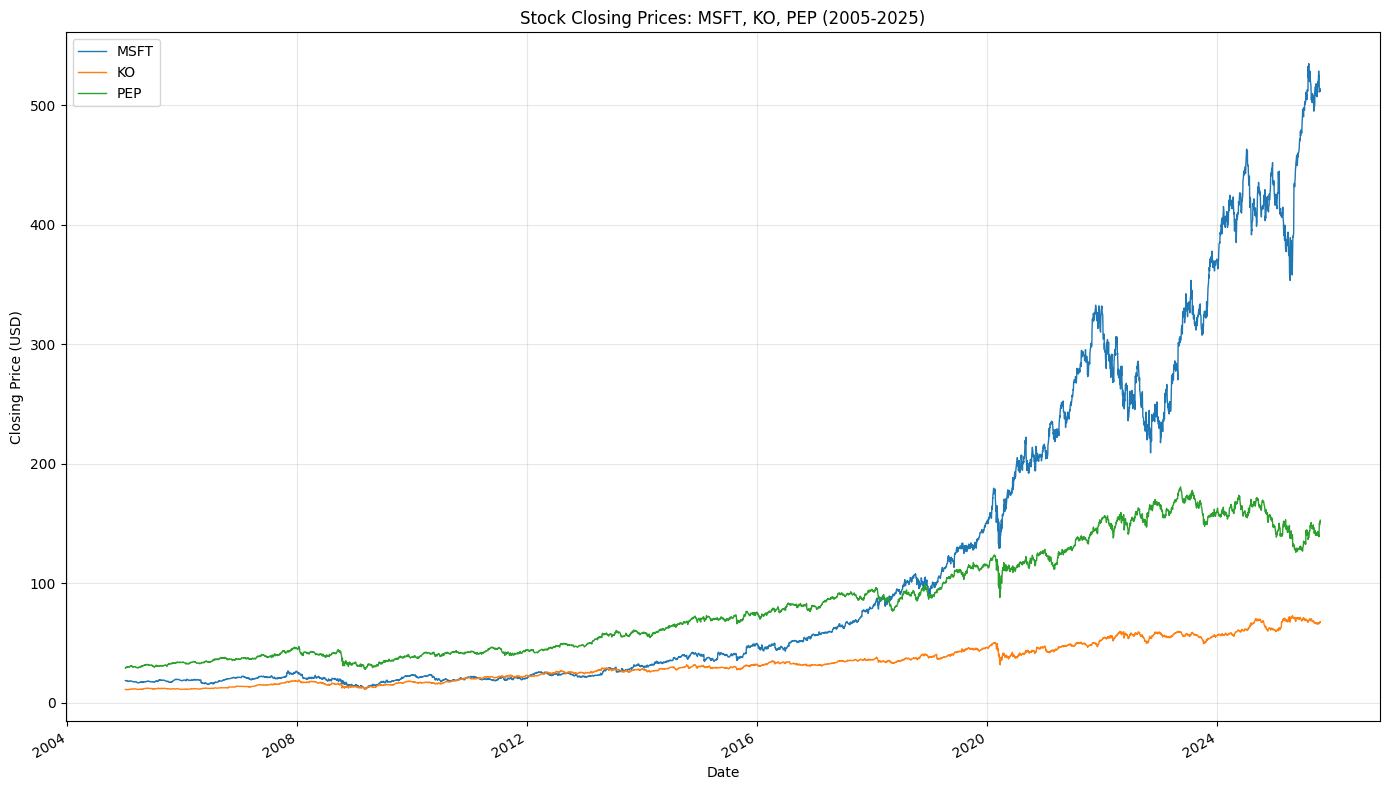

In [16]:
plt.figure(figsize=(14, 8))

combined_closing.plot(title='Stock Closing Prices: MSFT, KO, PEP (2005-2025)', 
                      linewidth=1,
                      figsize=(14, 8))

plt.ylabel('Closing Price (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Exercise 1.2

* Import the EURGBP data from the file located at `"http://coin.wne.uw.edu.pl/pwojcik/hfd/EURGBP-2023-08.csv"
` (data was downloaded from https://www.truefx.com)
* NOTE! The file DOES NOT HAVE a row with column names - assign the following column names: symbol, date_time, bid, ask
* Create a valid datetime index
* Plot the selected columns on the chart

In [ ]:
EURGBP_url = "http://coin.wne.uw.edu.pl/pwojcik/hfd/EURGBP-2023-08.csv"

EURGBP_ticks = pd.read_csv(EURGBP_url)

EURGBP_ticks.columns = ['symbol', 'date_time', 'bid', 'ask']

EURGBP_ticks.head()

,symbol,date_time,bid,ask
0,EUR/GBP,20230801 00:00:00.050,0.85695,0.85704
1,EUR/GBP,20230801 00:00:00.112,0.85696,0.85706
2,EUR/GBP,20230801 00:00:00.128,0.85695,0.85705
3,EUR/GBP,20230801 00:00:00.536,0.85696,0.85705
4,EUR/GBP,20230801 00:00:00.927,0.85695,0.85705


In [6]:
EURGBP_ticks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334309 entries, 0 to 5334308
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   symbol     object 
 1   date_time  object 
 2   bid        float64
 3   ask        float64
dtypes: float64(2), object(2)
memory usage: 162.8+ MB


In [9]:
EURGBP_ticks['date_time'] = pd.to_datetime(EURGBP_ticks['date_time'], format='%Y%m%d %H:%M:%S.%f')
EURGBP_ticks.set_index('date_time', inplace=True)

In [10]:
print(EURGBP_ticks.head())

                          symbol      bid      ask
date_time                                         
2023-08-01 00:00:00.050  EUR/GBP  0.85695  0.85704
2023-08-01 00:00:00.112  EUR/GBP  0.85696  0.85706
2023-08-01 00:00:00.128  EUR/GBP  0.85695  0.85705
2023-08-01 00:00:00.536  EUR/GBP  0.85696  0.85705
2023-08-01 00:00:00.927  EUR/GBP  0.85695  0.85705


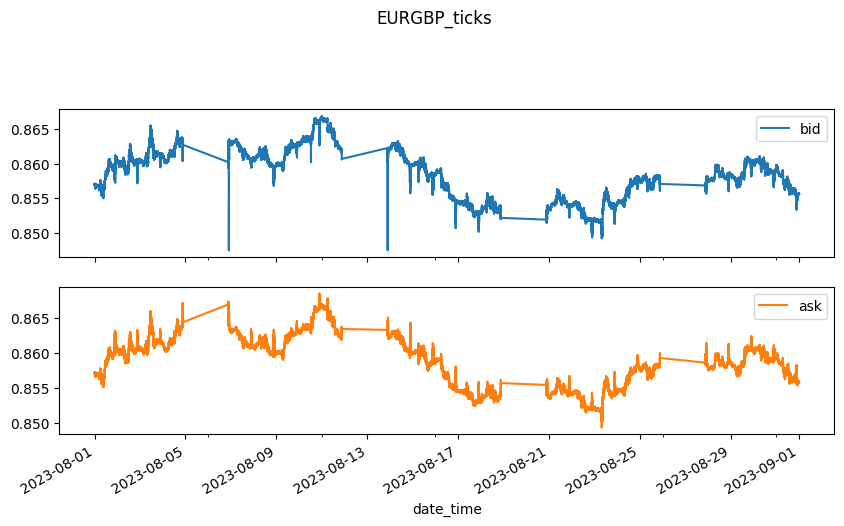

In [ ]:
EURGBP_ticks[['bid', 'ask']].plot(subplots = True, layout = (4, 1), 
                                  title = "EURGBP_ticks", figsize = (10, 10))
plt.show()

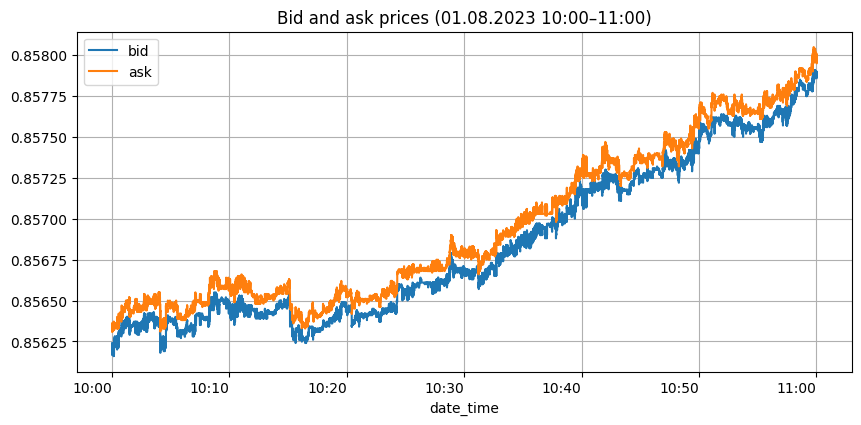

In [ ]:
EURGBP_ticks.sort_index(inplace=True)

ax = EURGBP_ticks['2023-08-01 10:00:00':'2023-08-01 11:00:00'][['bid', 'ask']].plot(
    title="Bid and ask prices (01.08.2023 10:00–11:00)",
    grid=True,
    figsize=(10, 5)
)

# Formatting of X axis: only hour and minute
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation = 0)

plt.show()

# Exercise 1.3

Aggregate EURGBP data into intervals (bars) that cover the following time periods:
* 15 seconds,
* 3 minutes
* 2 hours

In [20]:
# 15 seconds
EURGBP_second = EURGBP_ticks.resample('15s').agg({
    'bid': 'last',
    'ask': 'last',
})

EURGBP_second.head()


,bid,ask
date_time,,
2023-08-01 00:00:00,0.85693,0.85712
2023-08-01 00:00:15,0.85700,0.85709
2023-08-01 00:00:30,0.85691,0.85712
2023-08-01 00:00:45,0.85696,0.85705
2023-08-01 00:01:00,0.85695,0.85705


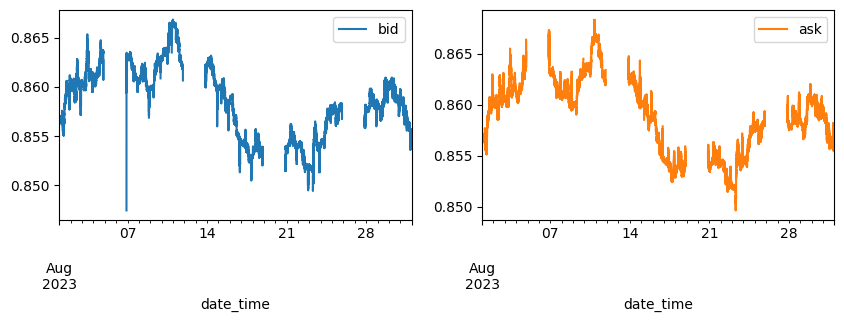

In [21]:
EURGBP_second.plot(subplots = True, 
                   layout = (2, 2),
                   figsize= (10, 6))
plt.show()

In [ ]:
# 3 minutes
EURGBP_minute = EURGBP_ticks.resample('3T').agg({
    'bid': 'last',
    'ask': 'last',
})

EURGBP_minute.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_18220\1113411963.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  EURGBP_minute = EURGBP_ticks.resample('3T').agg({


,bid,ask
date_time,,
2023-08-01 00:00:00,0.85690,0.85711
2023-08-01 00:03:00,0.85703,0.85713
2023-08-01 00:06:00,0.85701,0.85711
2023-08-01 00:09:00,0.85701,0.85710
2023-08-01 00:12:00,0.85699,0.85709


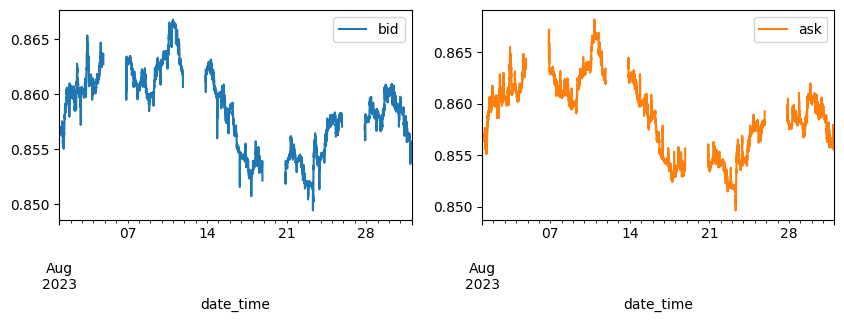

In [26]:
EURGBP_minute.plot(subplots = True, 
                   layout = (2, 2),
                   figsize= (10, 6))
plt.show()

In [27]:
# 2 hours
EURGBP_hour = EURGBP_ticks.resample('2h').agg({
    'bid': 'last',
    'ask': 'last',
})

EURGBP_hour.head()

,bid,ask
date_time,,
2023-08-01 00:00:00,0.85693,0.85701
2023-08-01 02:00:00,0.85671,0.85681
2023-08-01 04:00:00,0.85748,0.85758
2023-08-01 06:00:00,0.85652,0.85662
2023-08-01 08:00:00,0.85623,0.85629


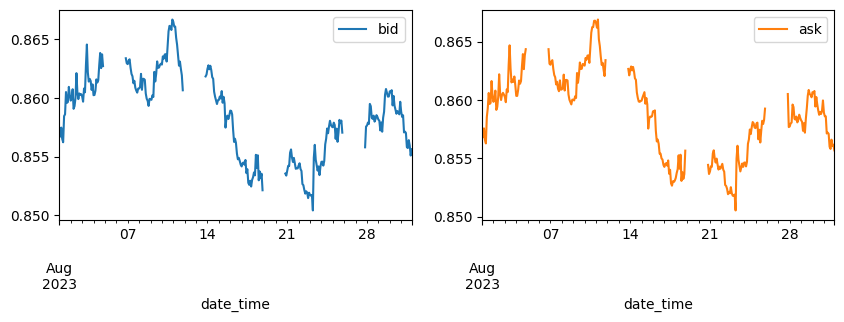

In [28]:
EURGBP_hour.plot(subplots = True, 
                   layout = (2, 2),
                   figsize= (10, 6))
plt.show()